In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [18]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `costs.py` file

# 2. Grid Search

Fill in the `grid_search.py` file

Let us play with the grid search demo now!

Grid Search: loss*=71.1270196108493, w0*=71.42857142857142, w1*=9.183673469387742, execution time=0.019 seconds


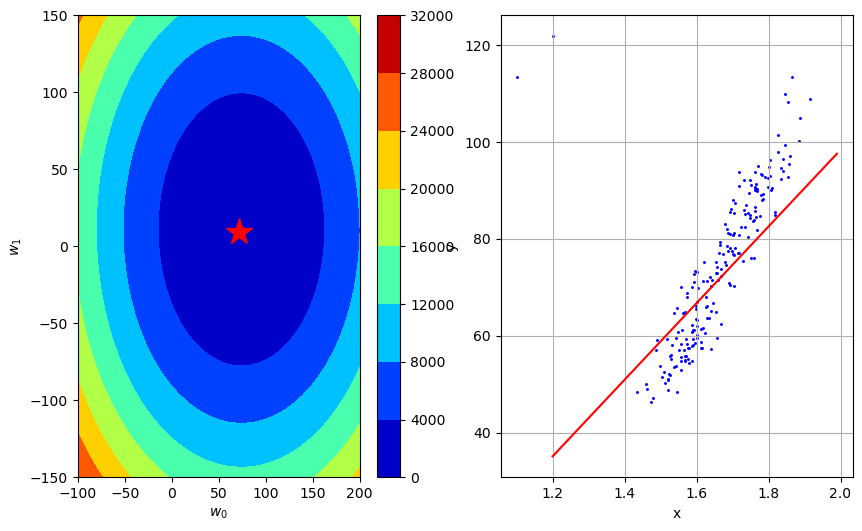

In [5]:
from grid_search import generate_w, get_best_parameters, grid_search_mine
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search_mine(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")
fig

# 3. Gradient Descent

Test your gradient descent function through gradient descent demo shown below:

In [6]:
from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent_mine(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358533, w0=7.406780585492633, w1=1.1034894865989184
GD iter. 1/49: loss=2337.093281493536, w0=14.07288311243601, w1=2.0966300245379426
GD iter. 2/49: loss=1905.5723967292586, w0=20.072375386685046, w1=2.990456508683065
GD iter. 3/49: loss=1556.0404800701936, w0=25.471918433509178, w1=3.7949003444136755
GD iter. 4/49: loss=1272.9196275763516, w0=30.3315071756509, w1=4.518899796571224
GD iter. 5/49: loss=1043.5917370563393, w0=34.705137043578446, w1=5.170499303513016
GD iter. 6/49: loss=857.8361457351294, w0=38.64140392471324, w1=5.756938859760631
GD iter. 7/49: loss=707.3741167649495, w0=42.18404411773455, w1=6.284734460383481
GD iter. 8/49: loss=585.4998732991037, w0=45.372420291453736, w1=6.759750500944047
GD iter. 9/49: loss=486.7817360917685, w0=48.241958847801, w1=7.187264937448556
GD iter. 10/49: loss=406.82004495382694, w0=50.82454354851354, w1=7.572027930302613
GD iter. 11/49: loss=342.0510751320946, w0=53.14886977915482, w1=7.9183146238712645
GD 

In [7]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)
    return fig


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [8]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1447.4840554681, w0=5.380490787034395, w1=-5.407431045764886
SGD iter. 1/49: loss=2416.0028715056906, w0=12.331753796740891, w1=-5.729463277385933
SGD iter. 2/49: loss=721.6705453928276, w0=16.130886712006763, w1=-8.75858632553318
SGD iter. 3/49: loss=130.07631086660672, w0=17.74381145213946, w1=-11.352935247609407
SGD iter. 4/49: loss=621.4098506566775, w0=21.269176257820362, w1=-12.720173360468308
SGD iter. 5/49: loss=545.919903459697, w0=24.57347619414484, w1=-15.425026475923314
SGD iter. 6/49: loss=503.4250640230354, w0=27.746566372576694, w1=-17.81476517848001
SGD iter. 7/49: loss=960.3509414332358, w0=32.12914767001599, w1=-17.77452130630914
SGD iter. 8/49: loss=4002.0735676494633, w0=41.075737598753605, w1=-3.9216802948164453
SGD iter. 9/49: loss=1865.3397811815707, w0=47.18366651317553, w1=6.503148117087768
SGD iter. 10/49: loss=139.90661043266886, w0=48.85642836372491, w1=5.920007027253243
SGD iter. 11/49: loss=197.34184936832872, w0=50.843093153609345, w1

In [9]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)
    
    return fig


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [10]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [11]:
y.shape, tx.shape

((202,), (202, 2))

In [12]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent_mine(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358533, w0=51.847464098448434, w1=7.724426406192428
GD iter. 1/49: loss=318.2821247015961, w0=67.40170332798299, w1=10.041754328050118
GD iter. 2/49: loss=88.6423556165127, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.945512217574596
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481912
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889339, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.03488900159354
GD it

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)
    return fig


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [14]:
from subgradient_mae import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7000000000000004, w1=7.237266341775239e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4000000000000008, w1=1.4474532683550478e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.1000000000000014, w1=2.1711799025325716e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8000000000000016, w1=2.8949065367100956e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5000000000000018, w1=3.6186331708876196e-15
SubGD iter. 5/499: loss=70.56780585492639, w0=4.200000000000002, w1=4.342359805065143e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.900000000000002, w1=5.066086439242667e-15
SubGD iter. 7/499: loss=69.16780585492637, w0=5.600000000000002, w1=5.7898130734201904e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.3000000000000025, w1=6.513539707597714e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000003, w1=7.237266341775238e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000003, w1=7.960992975952761e-1

In [ ]:
from ipywidgets import IntSlider, interact
from plots import *
from helpers import *



def plot_two_figures(n_iter):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- SubGD ---
    fig1 = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig1.canvas.draw()  
    axes[0].imshow(fig1.canvas.buffer_rgba())
    axes[0].set_title("SubGD")
    axes[0].axis("off")  

    # --- GD ---
    fig2 = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig2.canvas.draw()
    axes[1].imshow(fig2.canvas.buffer_rgba())
    axes[1].set_title("GD")
    axes[1].axis("off")

    plt.tight_layout()
    return fig

interact(plot_two_figures, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_two_figures(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [27]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)

SubSGD iter. 0/499: loss=57.196231320067625, w0=0.7, w1=-0.11989181348833121
SubSGD iter. 1/499: loss=84.53436421233089, w0=1.4, w1=0.3302879327179626
SubSGD iter. 2/499: loss=88.7393025339633, w0=2.0999999999999996, w1=0.9449489138483493
SubSGD iter. 3/499: loss=78.76938177829022, w0=2.8, w1=1.1104017057809752
SubSGD iter. 4/499: loss=72.28989906875661, w0=3.5, w1=1.658796209538786
SubSGD iter. 5/499: loss=55.98158272583005, w0=4.2, w1=0.6212820157252454
SubSGD iter. 6/499: loss=56.60726602390534, w0=4.9, w1=0.4040250115454953
SubSGD iter. 7/499: loss=84.71001864929873, w0=5.6000000000000005, w1=1.0362994400271859
SubSGD iter. 8/499: loss=46.20253953289133, w0=6.300000000000001, w1=-0.17512344789899426
SubSGD iter. 9/499: loss=70.62647735456423, w0=7.000000000000001, w1=-0.08659593440986837
SubSGD iter. 10/499: loss=65.74717004603843, w0=7.700000000000001, w1=-0.4860537067964471
SubSGD iter. 11/499: loss=40.42507638025148, w0=8.4, w1=-1.322092564069263
SubSGD iter. 12/499: loss=107.41

In [28]:
from ipywidgets import IntSlider, interact


def plot_two_figures(n_iter):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- SubSGD ---
    fig1 = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig1.canvas.draw()  
    axes[0].imshow(fig1.canvas.buffer_rgba())
    axes[0].set_title("SubSGD")
    axes[0].axis("off")  

    # --- SGD ---
    fig2 = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig2.canvas.draw()
    axes[1].imshow(fig2.canvas.buffer_rgba())
    axes[1].set_title("SGD")
    axes[1].axis("off")

    plt.tight_layout()
    return fig

interact(plot_two_figures, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_two_figures(n_iter)>